In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings ("ignore")
print("Libraries Import Successfully")

Libraries Import Successfully


In [ ]:
datatype={"unique_id" : "object", "amount" : "float64", "date_time_of_pickup" : "object",
"longitude_of_pickup" : "float64", "latitude_of_pickup" : "float64",
"longitude_of_dropoff" : "float64",
"latitude_of_dropoff" : "float64", "no_of_passenger" : "int64"
}
df_raw = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv", low_memory=False, dtype=datatype, parse_dates=["date_time_of_pickup"])
df_raw.drop(['unique_id'],axis=1,inplace=True)
df_raw.head ()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df_raw.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
df_raw.shape

(50000, 7)

In [ ]:
#Creating datetime features based on pickup_datetime
import calendar
df_raw['pickup_date']= df_raw['date_time_of_pickup'].dt.date
df_raw['pickup_day']=df_raw['date_time_of_pickup'].apply(lambda x:x.day)
df_raw['pickup_hour']=df_raw['date_time_of_pickup'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week']=df_raw['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df_raw['pickup_month']=df_raw['date_time_of_pickup'].apply(lambda x:x.month)
df_raw['pickup_year']=df_raw['date_time_of_pickup'].apply(lambda x:x.year)
df_raw.head ()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


<Axes: ylabel='amount'>

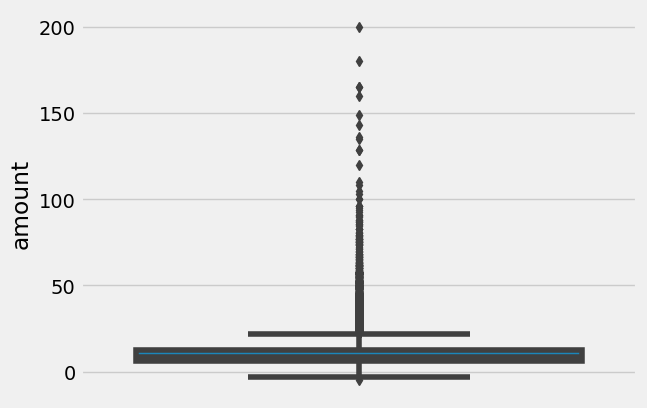

In [ ]:
sns.boxplot(y='amount', data=df_raw)

In [ ]:
# def remove_outlier (col):
#   sorted(col)
#   Q1,Q3=col.quantile([0.25,0.75])
#   IQR=Q3-Q1
#   lower_range=Q1-(1.5*IQR)
#   upper_range=Q3+(1.5*IQR)
#   return lower_range, upper_range

In [ ]:
# lowage, highage=remove_outlier(df_raw["amount"])
# df_raw["amount"]=np.where(df_raw["amount"]>highage, highage,df_raw["amount"])
# df_raw["amount"]=np.where(df_raw["amount"]<lowage, lowage, df_raw["amount"])

In [ ]:
# sns.boxplot(y="amount",data=df_raw)

In [ ]:
df_raw.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_month,pickup_year
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840,15.672040,13.489080,6.273300,2011.739260
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195,8.660789,6.506935,3.461157,1.862639
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [ ]:
df_raw.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
pickup_date             0
pickup_day              0
pickup_hour             0
pickup_day_of_week      0
pickup_month            0
pickup_year             0
dtype: int64

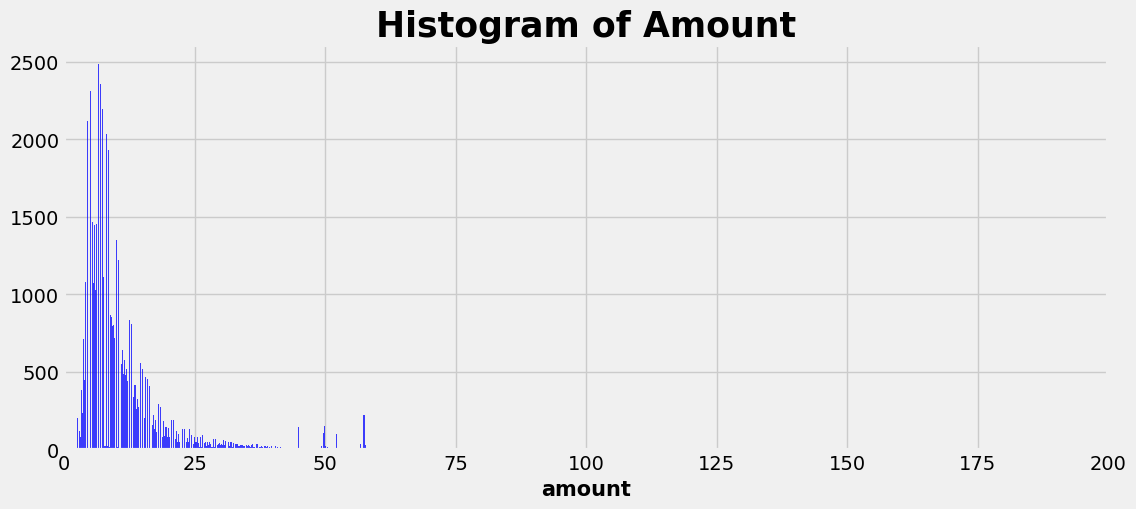

In [ ]:
#Visualising Target Variable
plt.figure(figsize = (12, 5))
n, bins, patches = plt.hist(df_raw.amount,1000, facecolor='blue', alpha=0.75)
plt.xlabel('amount',fontsize=15, fontweight='bold')
plt.title('Histogram of Amount', fontsize=25, fontweight='bold')
plt.xlim(0, 200)
plt.show();

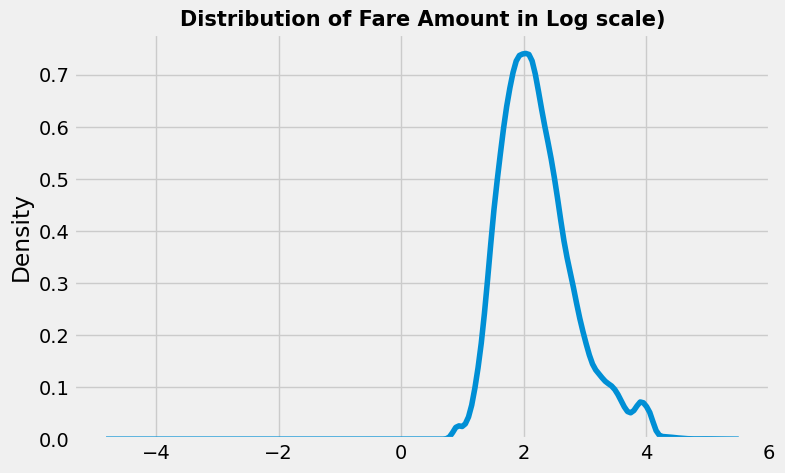

In [ ]:
plt.figure(figsize= (8,5))
sns.kdeplot(np.log(df_raw['amount'].values)).set_title(
"Distribution of Fare Amount in Log scale)", fontsize=15, fontweight='bold');

In [ ]:
df_raw['amount'].value_counts(normalize=True).iloc[:5]

6.5    0.04936
4.5    0.04208
8.5    0.03858
6.1    0.02882
5.3    0.02880
Name: amount, dtype: float64

Text(0, 0.5, 'Count')

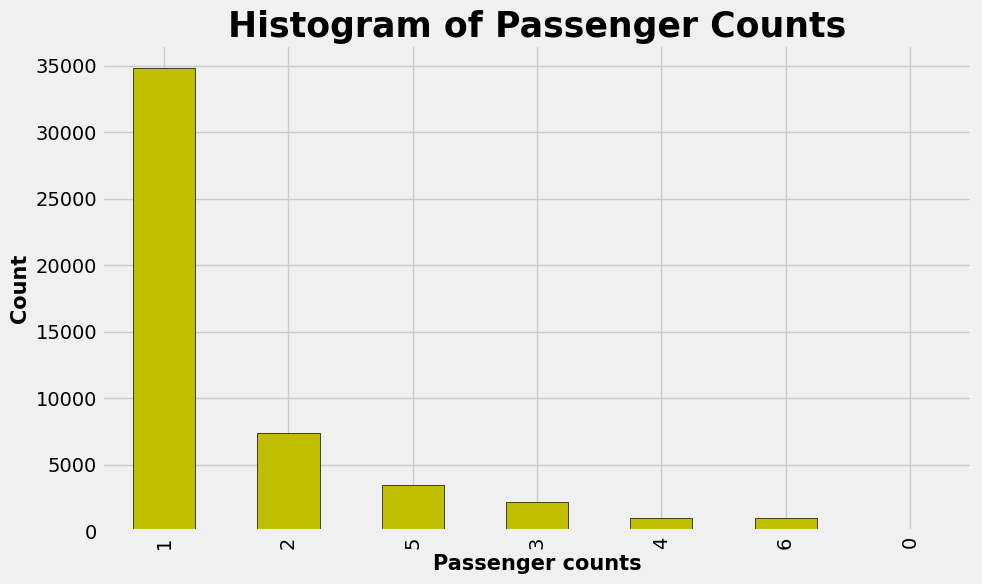

In [ ]:
#Passenger count
plt.figure(figsize=(10,6))
df_raw['no_of_passenger'].value_counts().plot.bar(color = 'y', edgecolor = 'k');
plt.title('Histogram of Passenger Counts',fontsize=25,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15, fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

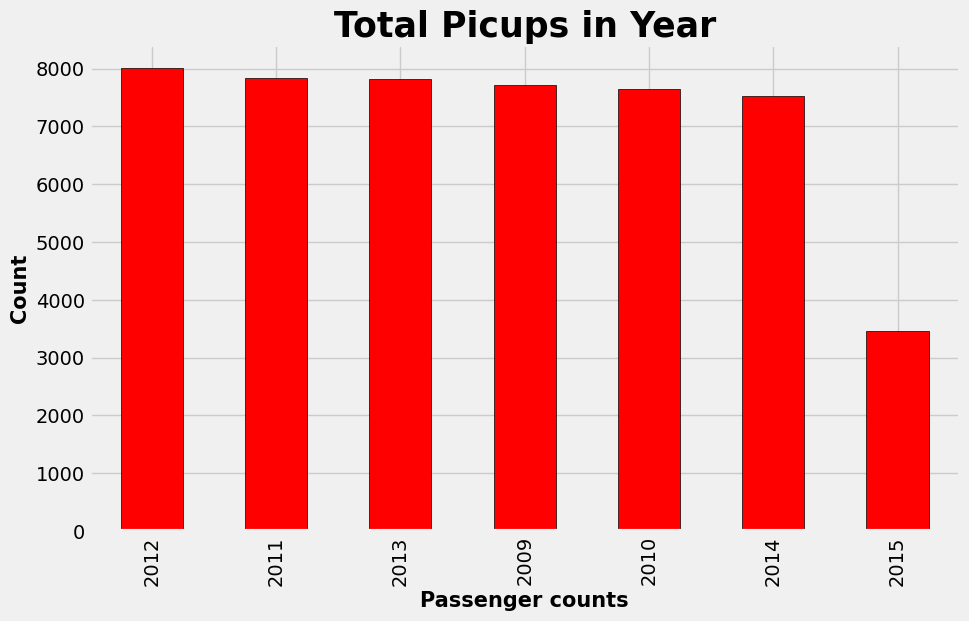

In [ ]:
plt.figure(figsize= (10, 6))
df_raw['pickup_year'].value_counts().plot.bar(color ='r', edgecolor = 'k');
plt.title('Total Picups in Year', fontsize=25, fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

Text(0, 0.5, 'Count')

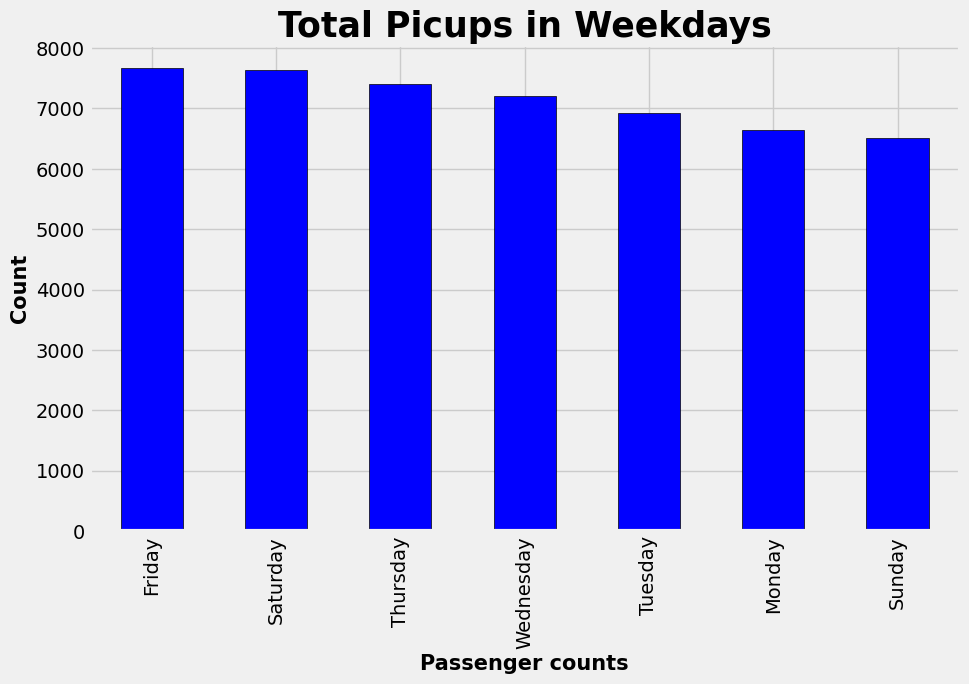

In [ ]:
plt.figure(figsize= (10,6))
df_raw['pickup_day_of_week'].value_counts().plot.bar(color = 'b',edgecolor = 'k');
plt.title('Total Picups in Weekdays',fontsize=25,fontweight='bold')
plt.xlabel('Passenger counts',fontsize=15,fontweight='bold')
plt.ylabel('Count',fontsize=15,fontweight='bold')

In [ ]:
df_raw['no_of_passenger'].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

(-74.03, -73.75)

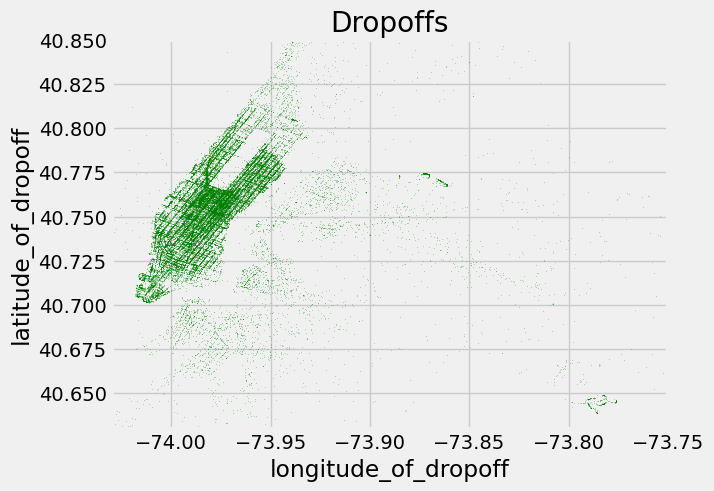

In [ ]:
#Plot Heatmap of Pickups and Dropoffs within New York
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
df_raw.plot(kind='scatter', x='longitude_of_dropoff', y='latitude_of_dropoff',color='green',s =.02, alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

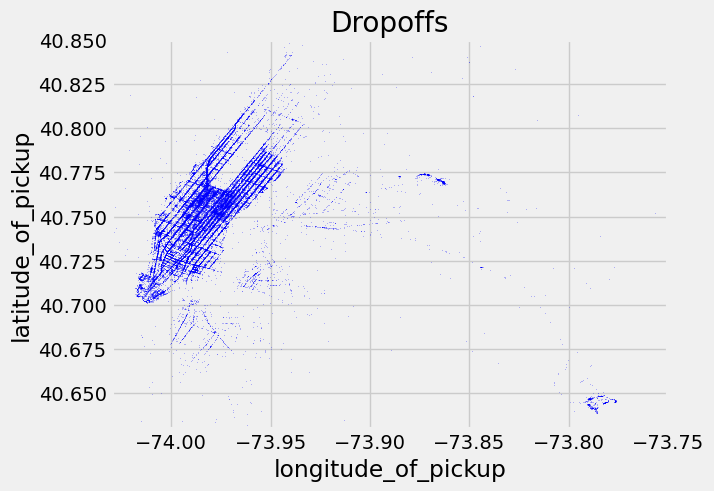

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
df_raw.plot(kind='scatter', x='longitude_of_pickup', y='latitude_of_pickup',color='blue',s =.02, alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
def distance(lat1, Ion1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np. cos ((lat2 - lat1) * p)/2 + np.cos (lat1 * p) * np. cos (lat2 * p) * (1 - np.cos ( (lon2 - Ion1) * p)) / 2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
# add new column to dataframe with distance in miles
df_raw['distance_miles'] = distance(df_raw.latitude_of_pickup, df_raw.longitude_of_pickup,
df_raw.latitude_of_dropoff, df_raw.longitude_of_dropoff)
df_raw.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


Text(0.5, 1.0, 'Distribution Distance in Miles')

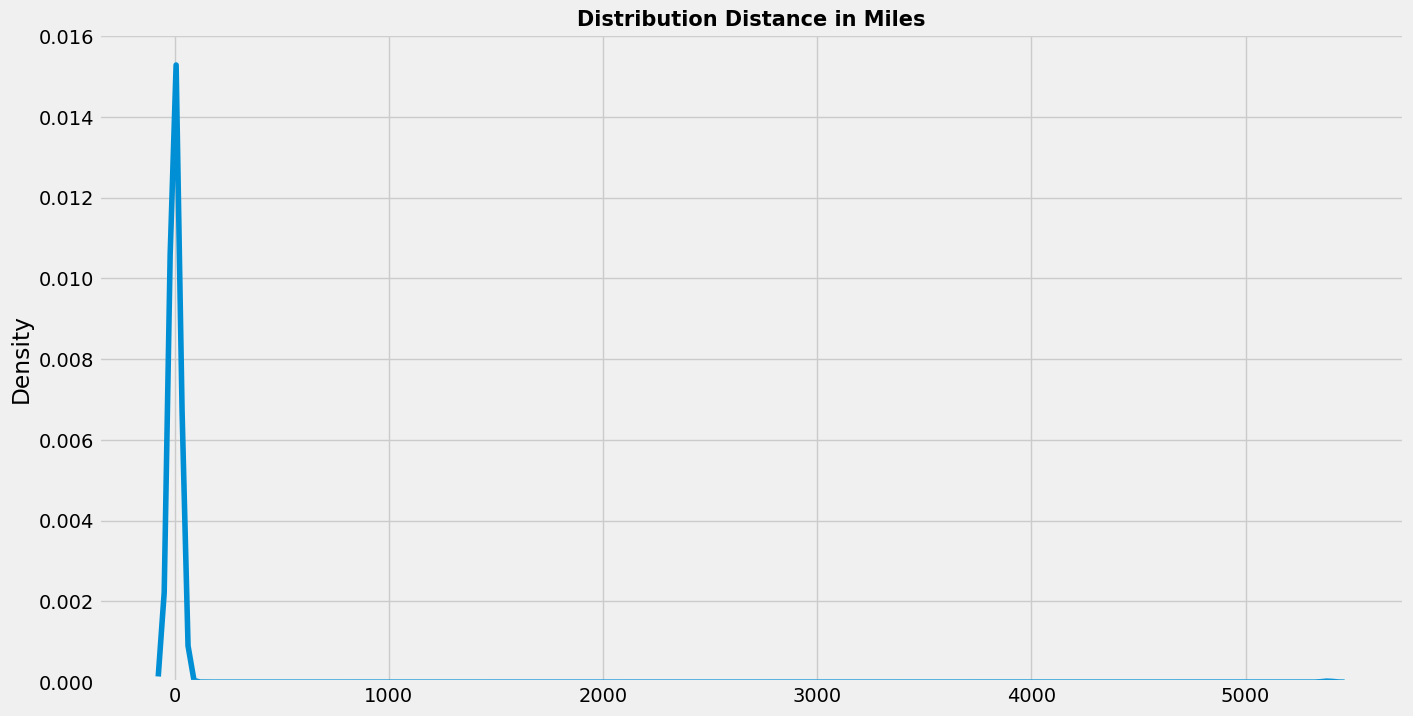

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_raw['distance_miles'].values).set_title('Distribution Distance in Miles',fontsize=15,fontweight='bold')

In [ ]:
import folium
Pickup_Locations = folium.Map(location= [40.767937, -73.982155 ],tiles='OpenStreetMap',zoom_start=12)
for each in df_raw[:500].iterrows () :
    folium.CircleMarker([each[1]['latitude_of_pickup'],each[1]['longitude_of_pickup']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['latitude_of_pickup'])+','+str(each[1]['longitude_of_pickup']),
                        fill_color=' #FD8A6C').add_to(Pickup_Locations)
Pickup_Locations

In [ ]:
import folium
Pickup_Locations = folium.Map(location= [40.767937, -73.982155 ],tiles='OpenStreetMap',zoom_start=12)
for each in df_raw[:500].iterrows () :
    folium.CircleMarker([each[1]['latitude_of_dropoff'],each[1]['longitude_of_dropoff']],
                        radius=3,
                        color='red',
                        popup=str(each[1]['latitude_of_dropoff'])+','+str(each[1]['longitude_of_dropoff']),
                        fill_color=' #FD8A6C').add_to(Pickup_Locations)
Pickup_Locations

In [ ]:
df_final=df_raw.copy()
df_final.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [ ]:
variables={'Monday':1,'Tuesday':2,'Thursday':3,'saturday':4,'wednesday':5,'sunday':6,'friday':7}
year={2012: 1 ,2013 :2, 2011: 3, 2009: 4, 2010: 5, 2014: 6, 2015:7}
df_final['pickup_year']=df_final['pickup_year'].map(year)
df_final['pickup_day_of_week']=df_final['pickup_day_of_week'].map(variables)
df_final.drop(['date_time_of_pickup','pickup_date'],axis=1, inplace=True)
df_final.head ()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1.0,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2.0,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3.0,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,NaN,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2.0,3,5,1.242218


In [ ]:
from sklearn.model_selection import train_test_split
X=df_final.drop(['amount'],axis=1)
y=df_final [['amount']]
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of X_train (35000, 11)
shape of y_train (35000, 1)
shape of X_test (15000, 11)
shape of y_test (15000, 1)


In [ ]:
import xgboost

In [ ]:
model=xgboost.XGBRFRegressor()
model.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn import metrics
print('R square:',np.sqrt(metrics.r2_score(y_test,y_pred)))
print ('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print ('MSE:',metrics.mean_squared_error (y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.8625092194355669
MAE: 2.368609120347341
MSE: 24.341961304410184
RMSE: 4.933757321191445
